#### Importando os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', index_col=0)

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1169,7.6,0.500,0.29,2.3,0.086,5.0,14.0,0.99502,3.32,0.62,11.5,0
1510,6.4,0.360,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7,0
982,7.3,0.520,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,0
1520,6.5,0.530,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,0
283,8.9,0.400,0.32,5.6,0.087,10.0,47.0,0.99910,3.38,0.77,10.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
997,5.6,0.660,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,1
915,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,0
640,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,0
206,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,1


In [4]:
counts = df.quality.value_counts(normalize=True)
counts

0    0.864164
1    0.135836
Name: quality, dtype: float64

## Função .plot do Pandas

Podemos plotar vários gráficos facilmente com a função .plot do pandas  
Documentação dessa função: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Alguns tipos de gráficos possíveis:
- ‘line’ : line plot (default)

- ‘bar’ : vertical bar plot

- ‘barh’ : horizontal bar plot

- ‘hist’ : histogram

- ‘box’ : boxplot

- ‘kde’ : Kernel Density Estimation plot

- ‘density’ : same as ‘kde’

- ‘area’ : area plot

- ‘pie’ : pie plot

- ‘scatter’ : scatter plot

- ‘hexbin’ : hexbin plot.

In [5]:
df.sort_index(inplace=True)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0


<AxesSubplot:>

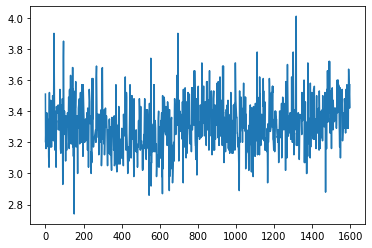

In [23]:
df['pH'].plot()

<AxesSubplot:ylabel='Frequency'>

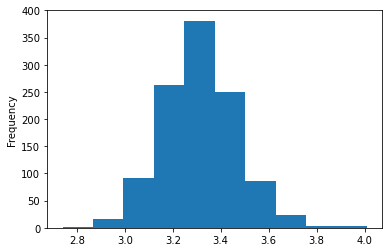

In [25]:
df['pH'].plot(kind='hist')

### Boxplots

<AxesSubplot:>

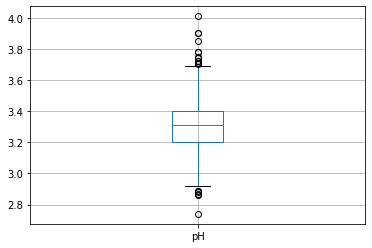

In [27]:
# Três maneiras diferentes para o mesmo plot

# df['pH'].plot(kind='box')
# df.plot(y='pH', kind='box')
df.boxplot(column='pH')

### Barplots

<AxesSubplot:>

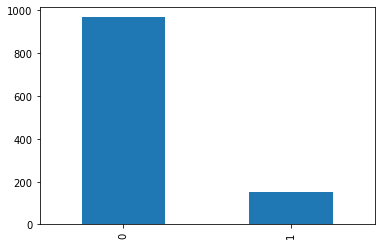

In [9]:
df['quality'].value_counts().plot(kind='bar')

<AxesSubplot:>

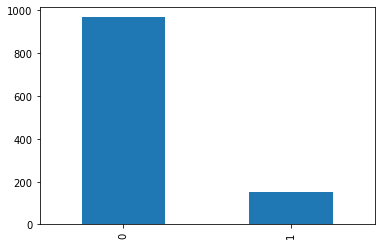

In [10]:
# O mesmo gráfico, porém chamado de maneira alternativa
df['quality'].value_counts().plot.bar()

<AxesSubplot:>

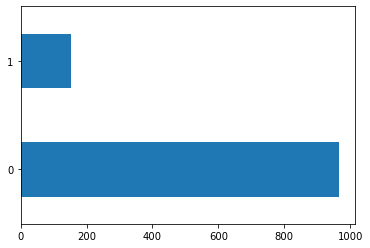

In [11]:
df['quality'].value_counts().plot.barh()

### Scatter Plot

<AxesSubplot:xlabel='pH', ylabel='fixed acidity'>

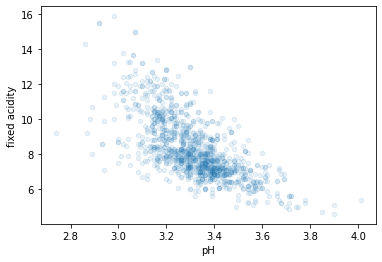

In [34]:
df.plot.scatter(x="pH", y="fixed acidity", alpha=0.1)

## Biblioteca Matplotlib

Além dos gráficos que conseguimos com a função .plot, podemos utilizar a biblioteca Matplotlib para plotar diversos gráficos diferentes e customizáveis

Introdução da biblioteca: https://matplotlib.org/stable/tutorials/introductory/sample_plots.html  
Galeria de exemplos: https://matplotlib.org/stable/gallery/index.html

In [13]:
import matplotlib.pyplot as plt

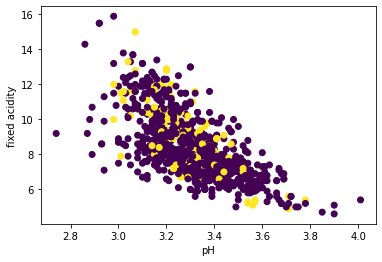

In [14]:
plt.scatter(x=df['pH'], y=df['fixed acidity'], c=df['quality'])
plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.show()

Referência de **colormaps**:   

https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python  
https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

### Plotando um Scatter plot com Legenda

Referência: https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/scatter_with_legend.html

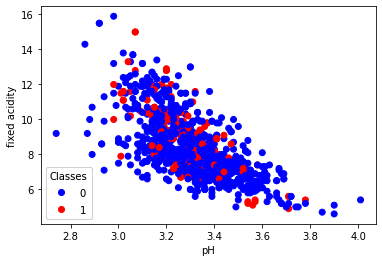

In [69]:
fig, ax = plt.subplots()

scatter_plot = ax.scatter(
    x=df['pH'], 
    y=df['fixed acidity'], 
    c=df['quality'], 
    cmap="bwr",
)
plt.xlabel('pH')
plt.ylabel('fixed acidity')

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter_plot.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

Ou outra maneira interessante (e talvez mais simples), plotando cada classe de uma vez no mesmo gráfico:

Referência: https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-simplest-manner-possible

E outra boa referência ensinando como usar as legendas:  
https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/

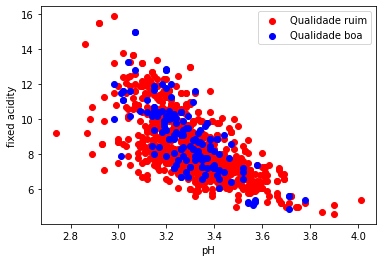

In [73]:
df_classe_0 = df[df['quality']==0] # <- Lembram de como filtrar dataframe?
df_classe_1 = df[df['quality']==1]

plt.scatter(x=df_classe_0['pH'], # <- x do gráfico
            y=df_classe_0['fixed acidity'], # y do gráfico
            c='red', # <- podemos passar uma cor aqui, de várias maneiras (HEX, RGB) (ver a documentação dessa função)
            label='Qualidade ruim' # <- Setamos a "label", nome que vai aparecer na legenda
)

# De forma análoga, para a classe 1
plt.scatter(x=df_classe_1['pH'], y=df_classe_1['fixed acidity'], c='blue', label='Qualidade boa')

plt.xlabel('pH')
plt.ylabel('fixed acidity')
plt.legend(loc="upper right") # <- Da pra mudar a localização nesse loc! 

plt.show()

## Biblioteca Seaborn

Outra biblioteca comumente utilizada para visualização de dados é a **Seaborn**, que oferece opções até mais "bonitas" de visualização.

Documentação da biblioteca: https://seaborn.pydata.org/

Tutorial e exemplos: https://seaborn.pydata.org/tutorial.html

### Gráfico de correlação

Documentação da função de correlação do Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html  
Referência do gráfico de correlação: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [16]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.262814,0.664034,0.112924,0.102202,-0.148660,-0.123669,0.666487,-0.679712,0.204463,-0.054149,0.138592
volatile acidity,-0.262814,1.000000,-0.564912,0.000289,0.079303,-0.012067,0.077285,0.004774,0.218667,-0.280207,-0.215498,-0.273667
citric acid,0.664034,-0.564912,1.000000,0.162956,0.190397,-0.044174,0.039583,0.365418,-0.528771,0.310442,0.127344,0.233055
residual sugar,0.112924,0.000289,0.162956,1.000000,0.078451,0.196567,0.190109,0.357216,-0.085177,0.011646,0.050126,0.055468
chlorides,0.102202,0.079303,0.190397,0.078451,1.000000,-0.001516,0.050276,0.220678,-0.262563,0.384198,-0.224531,-0.079000
free sulfur dioxide,-0.148660,-0.012067,-0.044174,0.196567,-0.001516,1.000000,0.678268,-0.019057,0.065319,0.062245,-0.091702,-0.085915
total sulfur dioxide,-0.123669,0.077285,0.039583,0.190109,0.050276,0.678268,1.000000,0.062712,-0.075095,0.041710,-0.224973,-0.151192
density,0.666487,0.004774,0.365418,0.357216,0.220678,-0.019057,0.062712,1.000000,-0.354408,0.175921,-0.482654,-0.113519
pH,-0.679712,0.218667,-0.528771,-0.085177,-0.262563,0.065319,-0.075095,-0.354408,1.000000,-0.218237,0.214437,-0.069147
sulphates,0.204463,-0.280207,0.310442,0.011646,0.384198,0.062245,0.041710,0.175921,-0.218237,1.000000,0.076238,0.198726


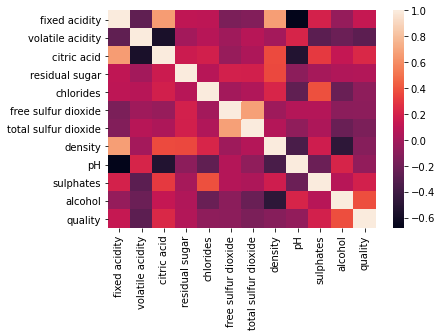

In [42]:
import seaborn as sns

sns.heatmap(df.corr())

<AxesSubplot:>

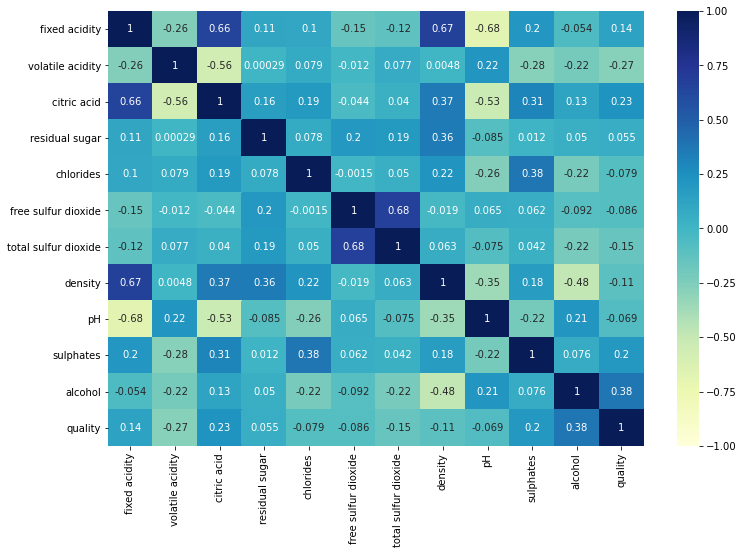

In [39]:
fig1 = plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")

### Salvando uma figura/imagem

Documentação: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html  
Referência: https://futurestud.io/tutorials/matplotlib-save-plots-as-file

In [40]:
fig1.savefig('correlacao_variaveis.pdf')